In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings

# ignore all warnings
warnings.filterwarnings("ignore")


/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv


# Loading DATA

In [42]:
df = pd.read_csv('/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [43]:
#Ensure that Data don't contain missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Statistical Analytics

In [44]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# DATA Visualisation

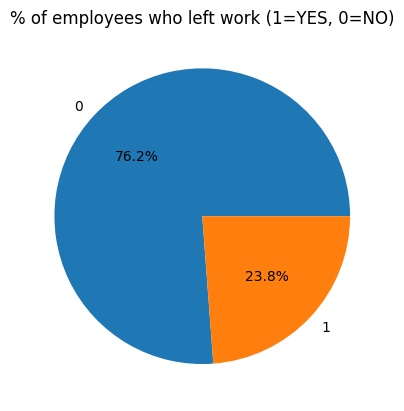

In [45]:
import matplotlib.pyplot as plt

counts = df['left'].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('% of employees who left work (1=YES, 0=NO)')
plt.show()

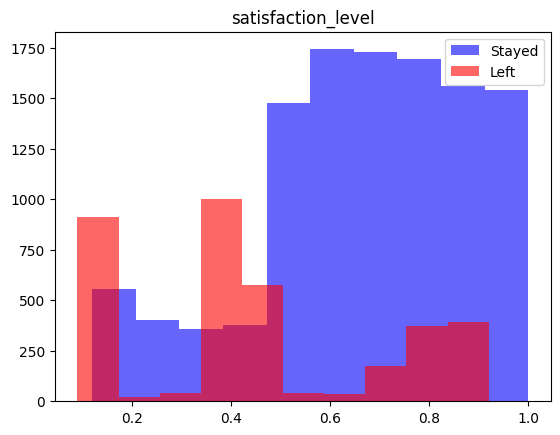

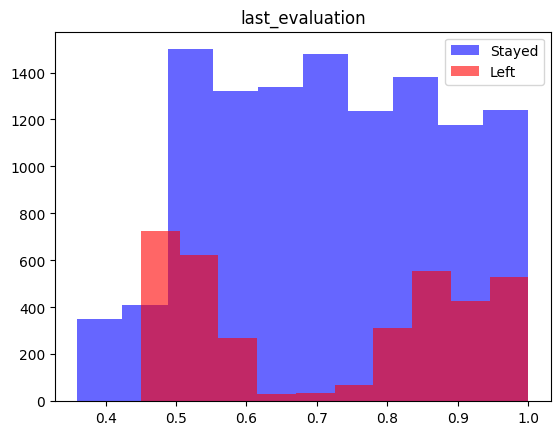

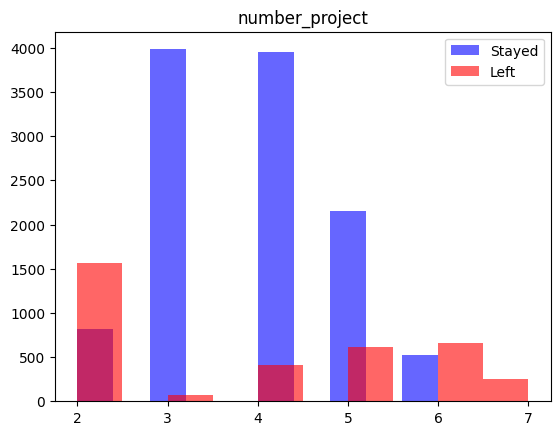

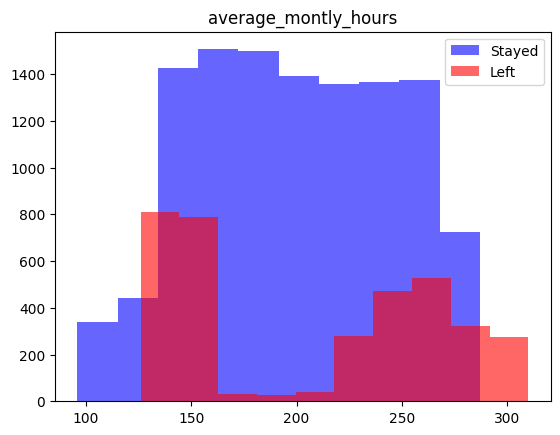

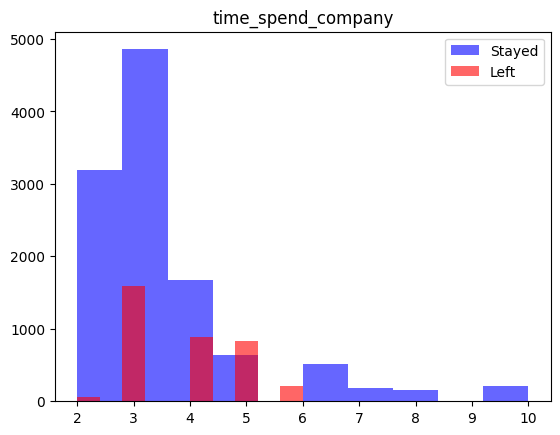

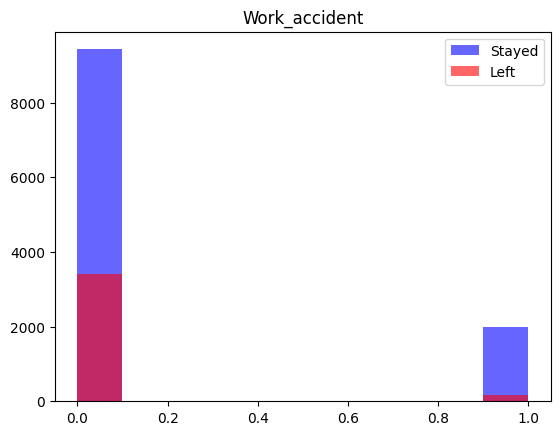

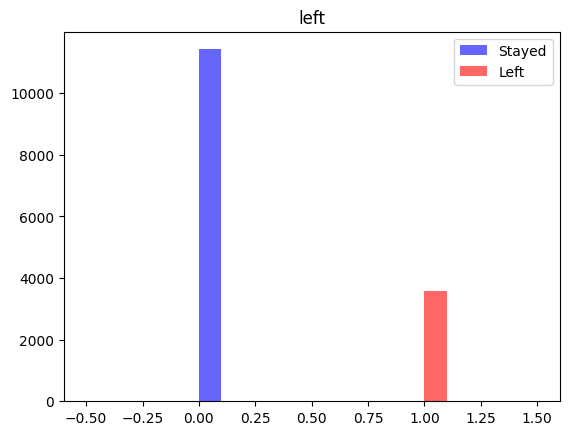

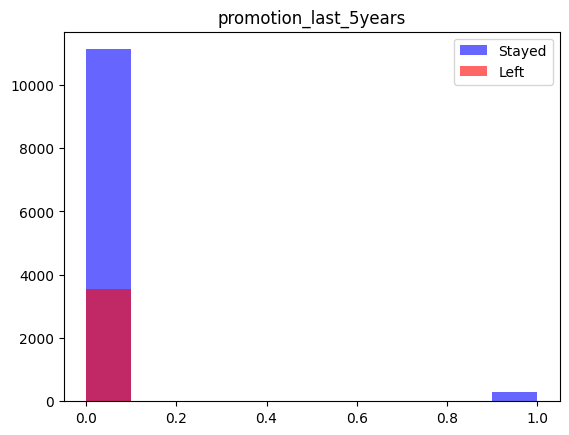

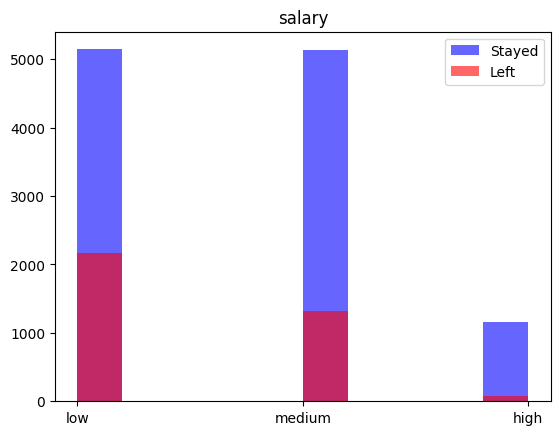

In [46]:
columns = df.columns
for c in columns:
    if (c!='Department') & (c!='Left'):
        plt.hist(df[df['left']==0][c], color='#0000FF', alpha=0.6)
        plt.hist(df[df['left']==1][c], color='#FF0000', alpha=0.6)
        plt.title(c)
        plt.legend(['Stayed', 'Left'])
        plt.show()

In [47]:
# This table show us the important features
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Conclusion

**After this analysis**, the features against retension are :

* satisfaction level : employees who left, have an average of 44% of satisfaction level
* monthly hours : a high monthly hours causes turnover
* Promotion : Promotion impossibility against retension
* Salary : low salary = resignation

# Machine Learning Model (Decision Tree)

In [48]:
#Delete non useful features
data = df.drop(df.columns[[1,2,4,5,8]], axis=1)
data.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary
0,0.38,157,1,0,low
1,0.80,262,1,0,medium
2,0.11,272,1,0,medium
3,0.72,223,1,0,low
4,0.37,159,1,0,low


In [49]:
#Encoding Salary (One Hot Encoding)
dataE = pd.get_dummies(data, columns=['salary'])
dataE.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,1,0,0,1,0
1,0.80,262,1,0,0,0,1
2,0.11,272,1,0,0,0,1
3,0.72,223,1,0,0,1,0
4,0.37,159,1,0,0,1,0


In [65]:
#Training model

#Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#Choosing Depended and Independed Variables
X = dataE.drop('left', axis=1)
y = dataE['left']

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#fitting model to training data
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Prediction
y_pred = dt.predict(X_test)

#Evaluate the performance of the model using accuracy and confusion matrix
print("Accuracy:", (accuracy_score(y_test, y_pred) * 100).round(2), '%')
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 92.7 %
Confusion matrix:
 [[2149  117]
 [ 102  632]]


# Explaination

**Accuracy** :
Accuracy measures the percentage of correct predictions made by a model, in this model **Accuracy = 92%**

In [66]:
table = {
    'Actual Positive' : [2149, 117],
    'Actual Negative' : [102, 632]
}

cm = pd.DataFrame(table, index=['Predected Positive', 'Predected Negative'])

cm

,Actual Positive,Actual Negative
Predected Positive,2149,102
Predected Negative,117,632


* The model correctly predicted that 2149 Employees Stayed (True Positive).
* The model incorrectly predicted that 102 Employee Stayed when they don't (False Positive).
* The model incorrectly predicted that 117 Employee Left when they don't (False Negative).
* The model correctly predicted that 632 Employee Left (True Negative)